# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

## Решение

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

Загружаем датасет

In [47]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

Разобъём данные на тренировочные и тестовые и отмасштабируем

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

Построим модель TSNE

In [49]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Построим диаграмму рассеяния

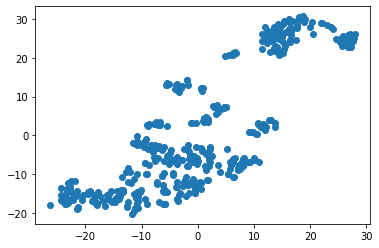

In [50]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

## Решение

In [51]:
from sklearn.cluster import KMeans

Построим модель KMeans

In [52]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Построим диаграмму рассеяния

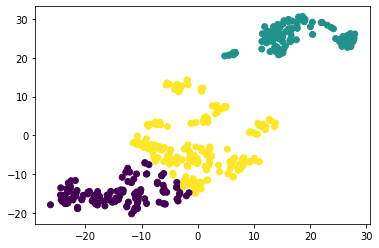

In [53]:
predict = model.fit_predict(X_train_tsne)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=predict)
plt.show()

Вычислим средние значения price

In [54]:
print('Кластер 0: {}'.format(y_train[predict == 0].mean()))
print('Кластер 1: {}'.format(y_train[predict == 1].mean()))
print('Кластер 2: {}'.format(y_train[predict == 2].mean()))

Кластер 0: 25.99304347826087
Кластер 1: 16.277227722772277
Кластер 2: 24.343617021276597


Вычислим средние значения CRIM

In [55]:
print('Кластер 0: {}'.format(X_train.loc[predict == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[predict == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[predict == 2, 'CRIM'].mean()))

Кластер 0: 0.08557826086956521
Кластер 1: 13.17982178217822
Кластер 2: 0.6227811170212766


## * Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

## Решение

Применим модель KMeans, построенную в предыдущем задании, к данным из тестового набора

In [56]:
predict = model.fit_predict(X_test_scaled)

Вычислим средние значения price

In [57]:
print('Кластер 0: {}'.format(y_test[predict == 0].mean()))
print('Кластер 1: {}'.format(y_test[predict == 1].mean()))
print('Кластер 2: {}'.format(y_test[predict == 2].mean()))

Кластер 0: 34.55384615384616
Кластер 1: 16.710526315789473
Кластер 2: 21.71764705882353


Вычислим средние значения CRIM

In [58]:
print('Кластер 0: {}'.format(X_test.loc[predict == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[predict == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[predict == 2, 'CRIM'].mean()))

Кластер 0: 0.08308461538461537
Кластер 1: 9.419181842105264
Кластер 2: 0.22250117647058823
